In [1]:
DATASET_ROOT = "/home/igor/datasets/VOC_merged/trainval"

In [2]:
from glob import glob
from os.path import join

images_list = glob(join(DATASET_ROOT, "JPEGImages/*.jpg"))
segmentation_maps_list = glob(join(DATASET_ROOT, "SegmentationClass/*.png"))

In [10]:
segmented_images = None
with open(join(DATASET_ROOT, "ImageSets/Segmentation/train.txt"), "r") as f:
    lines = f.readlines()
    segmented_images = [x.strip() for x in lines]

In [72]:
import matplotlib.pyplot as plt
import cv2

example = segmented_images[0]
test_img_path = DATASET_ROOT + "/JPEGImages/"+example+".jpg"
test_map_path = DATASET_ROOT + "/SegmentationClass/"+example+".png"
test_img = cv2.imread(test_img_path)
test_map = cv2.imread(test_map_path)

In [73]:
import numpy as np

hist = {}

for j in range(test_map.shape[0]):
    for i in range(test_map.shape[1]):
        pixel = tuple(test_map[j, i, :].tolist())
        if pixel not in hist.keys():
            hist[pixel] = 0
        hist[pixel] += 1

print(hist)

{(0, 0, 0): 129545, (192, 224, 224): 5355, (0, 0, 128): 4734, (128, 128, 192): 866}


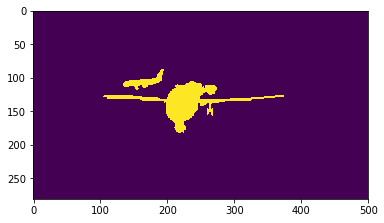

In [80]:
mask = np.zeros(shape=(test_img.shape[0], test_img.shape[1]), dtype=np.uint8)
for j in range(mask.shape[0]):
    for i in range(mask.shape[1]):
        if test_map[j, i, 0] == 0 and \
        test_map[j, i, 1] == 0 and \
        test_map[j, i, 2] == 128:
            mask[j, i] = 255

plt.imshow(mask)

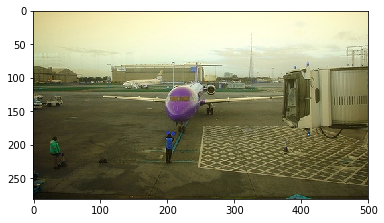

In [81]:
plt.imshow(test_img)

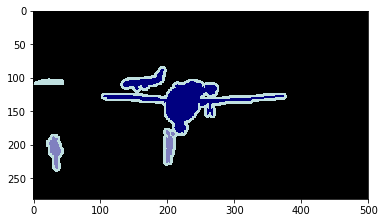

In [82]:
plt.imshow(test_map)

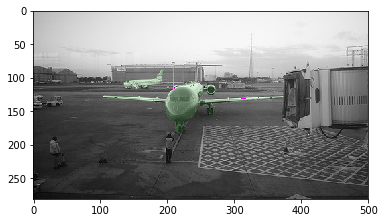

In [89]:
gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
gray_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
gray_rgb[:,:,1] += (0.1*mask).astype(np.uint8)

plt.imshow(gray_rgb)